# Formulation Question

## 1.

Content publishers such as The New York Times, The Washington Post and The Wall Street Journal generate revenue by using display advertisements. The Washington Post's website contains several different sections including Sports and National. The number of views each section gets per day can be estimated by analyzing historical data. Assume that the Sports section gets six million views per day and the National section get five million views per day. Assume four companies, GEICO, Delta, T-Mobile and Capital One, wish to advertise on the Sports and National sections of the Washington Post and they contract directly with the newspaper. For each company, the contract specifies the number of times its display ads are shown in these two sections. The contracts sometimes also specify a total number of page views that can originate from any section of the newspaper. The page views promised by The Washington Post to each advertiser are summarized in the left table below (blank means no guarantee).

Assume that the contract also specifies that The Washington Post receives $2.40 per click- through from each of the four companies. However, not every page view leads to a click. If every 1000 views leads to 5 clicks, the click-through rate is 0.5%. Newspapers use historical data and tracking technologies to determine click-through rates. Assume that the relevant click-through rates are given in the right table below.

![title](img/picture.png)

## 1. Write out the optimization problem. Make sure to detail the decision variables, the objective function and the constraints.

Let $x_{gs}$ be the number of times GEICO's display ads are shown in Sports section and $x_{gn}$ be that in National section;

$x_{ds}$ be the number of times Delta's display ads are shown in Sports section, $x_{dn}$ be that in National section;

$x_{ts}$ be the number of times T-Mobile's display ads are shown in Sports section and $x_{tn}$ be that in National section;

$x_{cs}$ be the number of times Capital One's display ads are shown in Sports section and $x_{cn}$ be that in National section. 

Our objective is to maximize the profit of The Washington Post.

\begin{align}
\text{minimize} \quad &-2.4*(0.025*x_{gs}+0.008*x_{gn}+0.02*x_{ds}+0.01*x_{dn}+0.01*x_{cs}+0.03*x_{cn}+0.15*x_{cs}+0.02*x_{cn})\\
\text{s.t.}\quad &x_{gs} \geq 2\\
& x_{gn} \geq 1\\
& x_{ds} \geq 0\\
& x_{dn} \geq 1\\
& x_{dn} + x_{ds} \geq 2\\
& x_{ts} \geq 1\\
& x_{tn} \geq 1\\
& x_{ts} + x_{tn} \geq 3\\
& x_{cs} \geq 0\\
& x_{cn} \geq 0\\
& x_{cs} + x_{cn} \geq 2\\
& x_{gs} + x_{ds} + x_{ts} + x_{cs} \leq 6\\
& x_{gn} + x_{dn} + x_{tn} + x_{cn} \leq 5
\end{align}

## 2. What is the optimal solution? Give the values of the decision variables and the optimal objective function value.

In [1]:
# pip install gurobipy

In [2]:
import gurobipy as gp
from gurobipy import GRB

# optimal = gp.Model("trial")
# optimal.setParam('OutputFlag', True)

In [3]:
# Create a new model
optimal = gp.Model("optimal")

# adding the variables 
xgs = optimal.addVar(lb = 2,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xgs") 
xgn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xgn") 
xds = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xds") 
xdn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xdn") 
xts = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xts") 
xtn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xtn") 
xcs = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xcs") 
xcn = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xcn") 

# adding the constraints
optimal.addConstr(xds+xdn >= 2, 'cons1')
optimal.addConstr(xts+xtn >= 3, 'cons2')
optimal.addConstr(xcs+xcn >= 2, 'cons3')
optimal.addConstr(xgs+xds+xts+xcs <= 6, 'cons4')
optimal.addConstr(xgn+xdn+xtn+xcn <= 5, 'cons5')

# adding the objective functions
objective = -2.4*(0.025*xgs+0.008*xgn+0.02*xds+0.01*xdn+0.01*xcs+0.03*xcn+0.15*xcs+0.02*xcn)
# objective = -2.4*0.025*xgs-2.4*0.008*xgn-2.4*0.02*xds-2.4*0.01*xdn-2.4*0.01*xcs-2.4*0.03*xcn-2.4*0.15*xcs-2.4*0.02*xcn

# solve
optimal.setObjective(objective,GRB.MINIMIZE)
optimal.optimize()

# print the solution
print("---------------------------")
for v in optimal.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % objective.getValue())

op_profit = -1*objective.getValue()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-06-09
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x54f39b19
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.7002560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.3392000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.339200000e+00
---------------------------
xgs 2
xgn 1
xds 0
xdn 2
xts 1
xtn 2
xcs 3
xcn 0
Obj: -1.3392


## 3. Conduct sensitivity analyses of the optimal solution to different click-through rates as given in the table below. Do one cell at time if you want, e.g., sensitivity of the solution to different CTRs for GEICO in the Sports section, then in the National section; then do the same for each advertiser.

simultaneously change CTR for both national and sports from 0.5% to 3.5% by increments of 0.5% and visualise/compare it with the solution to original problem.

In [4]:
profit = []
gs_ctr_lst = []
gn_ctr_lst = []

for i in range(1,8,1):
    for j in range(1,8,1):
        print(i,j)
        gs_ctr = i*0.005
        gn_ctr = j*0.005

        # Create a new model
        optimal = gp.Model("optimal")

        # adding the variables 
        xgs = optimal.addVar(lb = 2,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xgs") 
        xgn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xgn") 
        xds = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xds") 
        xdn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xdn") 
        xts = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xts") 
        xtn = optimal.addVar(lb = 1,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xtn") 
        xcs = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xcs") 
        xcn = optimal.addVar(lb = 0,ub = GRB.INFINITY,vtype = GRB.CONTINUOUS,name="xcn") 

        # adding the constraints
        optimal.addConstr(xds+xdn >= 2, 'cons1')
        optimal.addConstr(xts+xtn >= 3, 'cons2')
        optimal.addConstr(xcs+xcn >= 2, 'cons3')
        optimal.addConstr(xgs+xds+xts+xcs <= 6, 'cons4')
        optimal.addConstr(xgn+xdn+xtn+xcn <= 5, 'cons5')

        # adding the objective
        objective = -2.4*(gs_ctr*xgs+gn_ctr*xgn+0.02*xds+0.01*xdn+0.01*xcs+0.03*xcn+0.15*xcs+0.02*xcn)

        # solve
        optimal.setObjective(objective,GRB.MINIMIZE)
        optimal.optimize()

        # save the solution
        profit.append(-1*objective.getValue())
        gs_ctr_lst.append(gs_ctr)
        gn_ctr_lst.append(gn_ctr)

1 1
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x89b78cfe
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.01s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.5970560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.2360000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.236000000e+00
1 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0x18fc48c3



Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6570560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.2960000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.296000000e+00
2 5
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xdebde769
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6690560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.3080000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 

Model fingerprint: 0xbd9a1857
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.6690560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.3080000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.308000000e+00
4 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xfd59a505
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 column


Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.368000000e+00
5 5
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xe99051f1
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.7410560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.3800000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.380000000e+00
5 6
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 

Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.7410560e+00   2.506000e+00   0.000000e+00      0s
       2   -1.3800000e+00   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective -1.380000000e+00
7 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 8 columns and 14 nonzeros
Model fingerprint: 0xcc2c64ba
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 4e-01]
  Bounds range     [1e+00, 2e+00]
  RHS range        [2e+00, 6e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 5 rows, 6 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.7530560e+00   2.506000e+00   0.000000e+00     

## 4. Provide a visualization of your results and comment on the results.

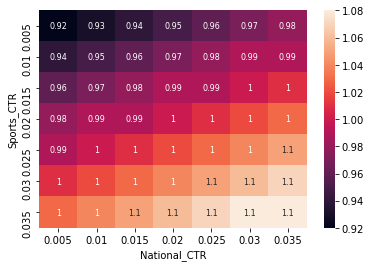

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

# take the percentage of new optimal profit of the optimal profit of question 2
relative_profit = [round(i / op_profit,2) for i in profit]

df = pd.DataFrame({'Sports_CTR': gs_ctr_lst, 'National_CTR': gn_ctr_lst, 'Profit': relative_profit})

# Turn long format into a wide format
df_wide = df.pivot_table(index='Sports_CTR', columns='National_CTR', values='Profit')

# plot it
sns.heatmap(df_wide, annot=True, annot_kws={"size": 8})

Comments:
Optimal profits are more sensitive regarding the CTR change in the Sports section, compared to that in the National section for GEICO.